In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 

In [5]:
tdf = pd.read_pickle("data/pkls/ntokens_embeddings_tool_df.pkl")

In [7]:
tdf.n_tokens.mean()

np.float64(221.50813786500717)

In [44]:
df.head()

,id,question,function,ground_truth,correct_tool,correct,reason,latency,response
0,live_multiple_0-0-0,"[[{'role': 'user', 'content': 'update my latte...","[{'name': 'ChaFod', 'description': 'Changes th...",[{'ChaDri_change_drink': {'drink_id': ['latte'...,[ChaDri_change_drink],True,Correct,4.166997,Response(id='resp_077bd51d11ae680c006994dfc7c1...
1,live_multiple_1-0-1,"[[{'role': 'system', 'content': 'You are an ag...","[{'name': 'ChaFod', 'description': 'Changes th...",[{'ChaDri_change_drink': {'drink_id': ['1234']...,[ChaDri_change_drink],False,extraneous unnecessary tool call,4.704834,Response(id='resp_0c7b6d329c71dd8e006994dfc7e1...
2,live_multiple_2-1-0,"[[{'role': 'user', 'content': 'Tôi cần một chu...","[{'name': 'uber_ride', 'description': 'Tìm chu...","[{'uber_ride': {'loc': ['2150 Shattuck Ave, Be...",[uber_ride],False,missing required tool call,3.723988,Response(id='resp_01fa035c0a605f67006994dfc7c3...
3,live_multiple_3-2-0,"[[{'role': 'user', 'content': 'Get weather of ...","[{'name': 'uber_ride', 'description': 'Finds a...","[{'api_weather': {'loc': ['Ha Noi, Vietnam']}}]",[api_weather],True,Correct,3.624818,Response(id='resp_0a530e07758ed1b8006994dfc7c5...
4,live_multiple_4-2-1,"[[{'role': 'user', 'content': 'Tìm chuyến xe c...","[{'name': 'uber_ride', 'description': 'Finds a...","[{'uber_ride': {'loc': ['123 Hanoi Street'], '...",[uber_ride],False,wrong parameters,6.209589,Response(id='resp_00744d2babd899ef006994dfc7c4...


In [45]:
counts = df['reason'].value_counts()

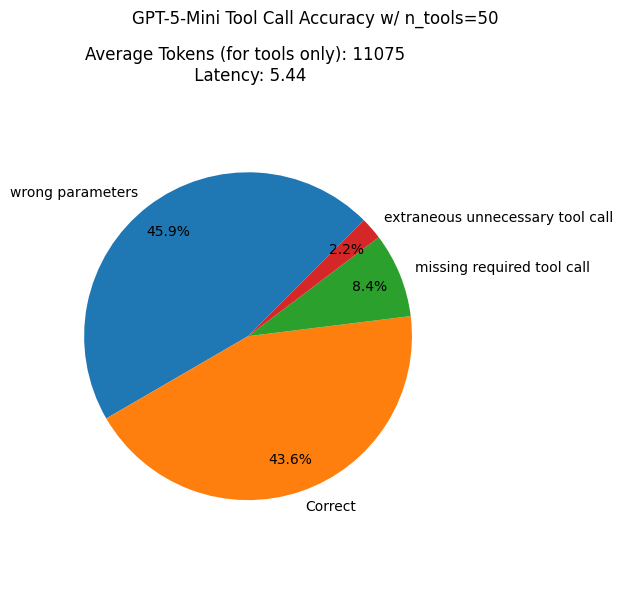

<Figure size 640x480 with 0 Axes>

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    labeldistance=1.1,
    pctdistance=0.8,
    startangle=45
)

fig.suptitle("GPT-5-Mini Tool Call Accuracy w/ n_tools=50")
ax.set_title("Average Tokens (for tools only): 11075 \n Latency: 5.44")
ax.axis('equal')  # keeps it circular

plt.tight_layout()
plt.show()
plt.savefig("figs/50-tools-gpt-5-mini.png")